In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df=pd.read_csv("titanic_train (1).csv")

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


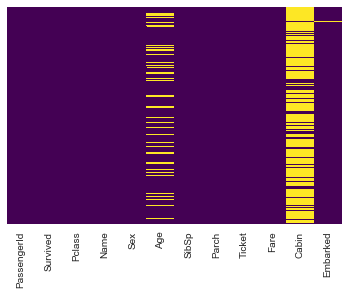

In [70]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [71]:
sns.set_style("whitegrid")

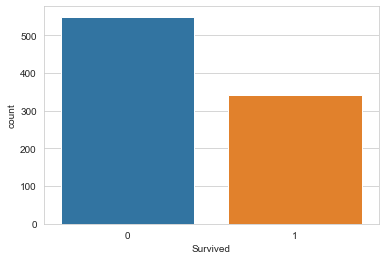

In [72]:
#Visiualizing the number of survived passenger against unsurvived ones.
sns.countplot(x="Survived",data=df)

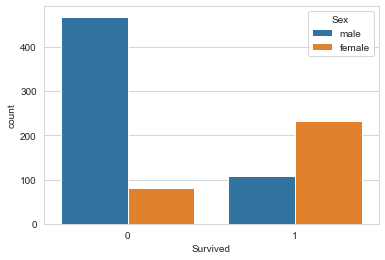

In [73]:
#Visiualizing the number of survived with respect to gender of the passenger
sns.countplot(x="Survived",data=df,hue="Sex")

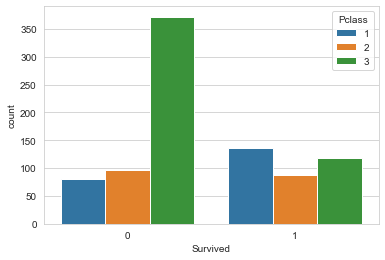

In [74]:
#Visualizing the number of survived passengers with regards to class of a passenger
sns.countplot(x="Survived",data=df,hue="Pclass")

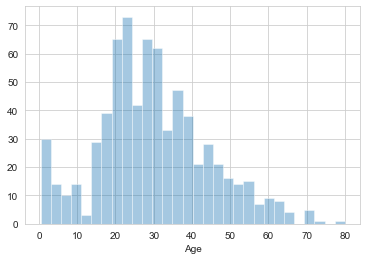

In [75]:
#Visualizing the destribution of passengers with respect to Age
sns.distplot(df["Age"].dropna(),kde=False,bins=30)

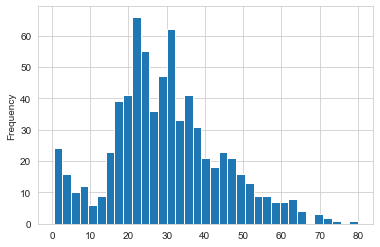

In [76]:
df["Age"].plot.hist(bins=35)

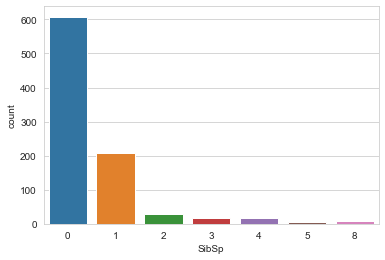

In [77]:
#Visualizing the distribution of passerngers with respect to SibSp 
sns.countplot(x="SibSp",data=df)

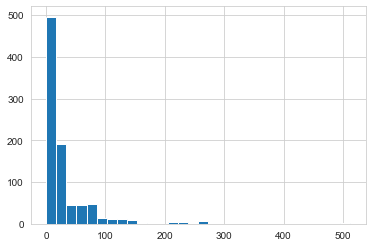

In [78]:
#Visualizing the distribution of passerngers with respect to Fare
df["Fare"].hist(bins=30)

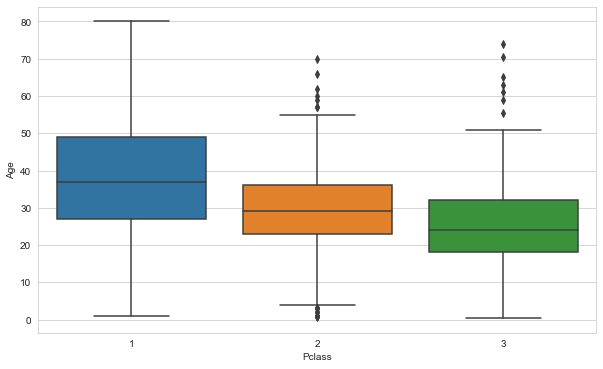

In [79]:
#Visualizing the distribution of passerngers with respect to Passenger'classes and Age
plt.figure(figsize=(10,6))
sns.boxplot(x="Pclass",y="Age",data=df)

In [80]:
#Fixing the missing values with regards to Passenger's Age and Class
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age

In [81]:
df.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [82]:
df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

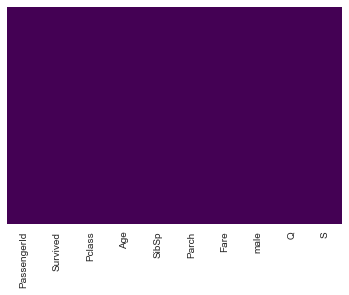

In [93]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [84]:
#Dropping Cabin column due to many missing values
df.drop("Cabin",axis=1,inplace=True)

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [86]:
df.dropna(inplace=True)

In [87]:
sex=pd.get_dummies(df["Sex"],drop_first=True)

In [88]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)

In [89]:
df=pd.concat([df,sex,embark],axis=1)

In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [91]:
df.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [92]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [94]:
x=df.drop("Survived",axis=1)

In [95]:
y=df["Survived"]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logmod=LogisticRegression()

In [100]:
logmod.fit(x_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
predictions=logmod.predict(x_test)

In [103]:
from sklearn.metrics import classification_report,confusion_matrix

In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       163
           1       0.80      0.63      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



In [105]:
print(confusion_matrix(y_test,predictions))

[[147  16]
 [ 38  66]]


In [106]:
pred_prob=logmod.predict_proba(x_test)

In [107]:
pred_prob

array([[0.86146976, 0.13853024],
       [0.846894  , 0.153106  ],
       [0.26143653, 0.73856347],
       [0.0911536 , 0.9088464 ],
       [0.82191673, 0.17808327],
       [0.91461117, 0.08538883],
       [0.73412203, 0.26587797],
       [0.82337961, 0.17662039],
       [0.85856559, 0.14143441],
       [0.39530035, 0.60469965],
       [0.23209912, 0.76790088],
       [0.12875146, 0.87124854],
       [0.84465997, 0.15534003],
       [0.50792126, 0.49207874],
       [0.81420126, 0.18579874],
       [0.8432259 , 0.1567741 ],
       [0.08427276, 0.91572724],
       [0.14967709, 0.85032291],
       [0.4227915 , 0.5772085 ],
       [0.88360164, 0.11639836],
       [0.89583796, 0.10416204],
       [0.85148119, 0.14851881],
       [0.74023737, 0.25976263],
       [0.76168994, 0.23831006],
       [0.88859553, 0.11140447],
       [0.61523485, 0.38476515],
       [0.68814771, 0.31185229],
       [0.3867181 , 0.6132819 ],
       [0.91649765, 0.08350235],
       [0.84055459, 0.15944541],
       [0.

In [108]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predictions)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.797752808988764

In [109]:
from sklearn.metrics import log_loss
log_loss(y_test, pred_prob)

0.47672940494999766

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predictions, labels=[1,0]))

[[ 66  38]
 [ 16 147]]


Confusion matrix, without normalization
[[ 66  38]
 [ 16 147]]


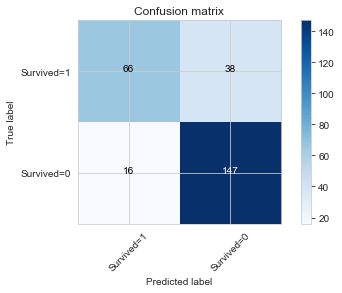

In [113]:
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Confusion matrix')

With regards to all evaluation metrics carried out on the model there is a 80% accuracy and the model will do well in predicting whether a passenger survived or did not survived